## Execution examples and experimentation results

In [1]:
from complete_code import *

## 1. Use examples

This part will introduce some functions and the results they give.

In [2]:
print("Distance between 1 and 50:", get_distance(1,50))

Distance between 1 and 50: 217


In [3]:
#Creation of a solution
sol = create_random_journey()
print(sol)

[47, 26, 40, 18, 25, 29, 37, 20, 19, 11, 14, 3, 33, 21, 12, 4, 42, 15, 46, 7, 6, 49, 45, 23, 43, 13, 39, 52, 36, 31, 44, 32, 27, 9, 8, 28, 5, 35, 10, 48, 38, 24, 16, 41, 50, 1, 51, 2, 17, 22, 34, 30]


In [4]:
#Fitness of a solution
fit = get_fitness(sol)
print(f"Journey's distance: {fit}")

Journey's distance: 31100


In [5]:
#Generation of a random population with 2 solutions
pop = generate_random_population(2)
print(pop)

[[7, 19, 35, 16, 44, 26, 49, 24, 3, 43, 18, 6, 4, 8, 1, 25, 41, 5, 40, 33, 14, 30, 28, 31, 48, 47, 29, 39, 34, 10, 12, 22, 32, 27, 52, 21, 36, 13, 17, 2, 42, 46, 15, 45, 51, 11, 20, 50, 9, 23, 38, 37], [34, 2, 35, 47, 27, 37, 10, 39, 31, 6, 15, 1, 41, 18, 3, 45, 28, 19, 29, 24, 52, 21, 11, 49, 26, 23, 40, 16, 22, 13, 44, 20, 51, 36, 42, 46, 7, 17, 25, 30, 50, 32, 33, 48, 38, 9, 4, 43, 8, 5, 14, 12]]


In [6]:
#Crossover example 1: PMX (from class)
print(aux_PMX([1,2,3,4,5,6,7,8,9],[9,3,7,8,2,6,5,1,4],3,6))
print(aux_PMX([9,3,7,8,2,6,5,1,4],[1,2,3,4,5,6,7,8,9],3,6))

[9, 3, 2, 4, 5, 6, 7, 1, 8]
[1, 7, 3, 8, 2, 6, 5, 4, 9]


In [7]:
#Crossover example 2: EX (from class)
EX([1,2,3,4,5,6,7,8,9],[9,3,7,8,2,6,5,1,4])

[[9, 8, 7, 3, 2, 6, 5, 1, 4]]

In [8]:
#Crossover example 3: OX (from [6] in document references)
aux_OX(["A","E","B","C","G","M","D","H","O","J","K","L","F","N","I"],
  ["F","D","A","N","K","H","L","M","I","G","J","E","B","C","O"],6,9)

['H', 'O', 'J', 'K', 'F', 'N', 'L', 'M', 'I', 'G', 'A', 'E', 'B', 'C', 'D']

In [8]:
#Crossover example 4: NWOX (from [6] in document references)
aux_NWOX(["A","E","B","C","G","M","D","H","O","J","K","L","F","N","I"],
  ["F","D","A","N","K","H","L","M","I","G","J","E","B","C","O"],6,9)

['F', 'A', 'N', 'K', 'L', 'M', 'D', 'H', 'O', 'J', 'I', 'G', 'E', 'B', 'C']

In [27]:
def CX2(parent1,parent2):
    child1,child2 = [],[]
    original_parent1 = list(parent1)
    while len(child1)!=len(original_parent1):
        child1.append(parent2[0])
        while True:
            ref1p1 = parent1.index(child1[-1])
            ref2p1 = parent1.index(parent2[ref1p1])
            new_valueoff2 = parent2[ref2p1]
            child2.append(new_valueoff2)
            new_valueoff1 = parent2[parent1.index(new_valueoff2)]
            if new_valueoff1 in child1:
                break
            child1.append(new_valueoff1)
        parent1 = [x for x in parent1 if x not in child2]
        parent2 = [x for x in parent2 if x in parent1]
    return [child1,child2]

## 2. Experimentation

Now the results of the experimentation with the different genetic algorithm's operators will be shown. Graphics describing the evolution of the best solution or the distributions of best results values as well as some statistical anaylisis to see if there are significant differences in the average best solution for a certain configuration will be part of this experimentation.

### 2.1. Crossover experimentation  
It has been defined a function to generate the population data (different populations in different text files) in a certain directory in order to reproduce later the experiments and compare the same populations among the comparison of the same type of operators (for instance, experiments about crossover):

In [10]:
import os
def generate_experimentation_data(directory, fname, instances, population_size, create_population=False):
    if not os.path.exists(directory):
        os.mkdir(directory)
    instance_list = []
    for i in range(instances):
        name = f"{directory}/{fname}-{i}.txt"
        instance_list.append(name)
        if create_population:
            population = generate_random_population(population_size)
            save_population(population,name)
    return instance_list

First step consists of generating the data for the experimentation, for instance, crossover operators. In case there is no need to generate new data but you want to redo the experiments, set the *create_population* parameter to False. This will read the existing instances of the specified directory.

In [11]:
instance_list = generate_experimentation_data("crossover_pops","TSP-Population",instances=50,population_size=100,create_population=False)

Experimentation: use the base genetic algorithm function with the described operators in the document and vary the crossover operator for this case. Concatenate all generated data into one dataframe and export it so there is no need to re-execute the experiments (it lasts around 30 minutes for this case)

In [4]:
iteration_data, final_data = pd.DataFrame(),pd.DataFrame()
for crs in [OX,EX,PMX,NWOX]:
    it,fi = base_GA(instance_list,crs,HPRM,ranked_wheel_selection,"elitist")
    # it,fi = crossover_GA(instance_list, crs)
    iteration_data = pd.concat([iteration_data,it])
    final_data = pd.concat([final_data,fi])
iteration_data = iteration_data.reset_index()
final_data = final_data.reset_index()
iteration_data.drop(columns=["MutOp","SelectOp","replacement"],inplace=True)
final_data.drop(columns=["MutOp","SelectOp","replacement"],inplace=True)
# iteration_data.to_csv("crossover_iteration_data_cr_0801.csv",index=False)
# final_data.to_csv("crossover_data_cr_0801.csv",index=False)

Importing the generated data and the necessary graphiking libraries:

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
cross_iteration_data = pd.read_csv("crossover_iteration_data_cr_0801.csv")
cross_final_data = pd.read_csv("crossover_data_cr_0801.csv")

Plotting the evolution of the best fitness during each iteration of the genetic algorithm for the different crossover operators:

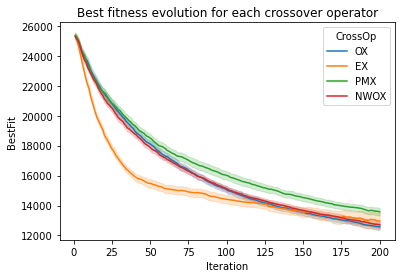

In [13]:
sns.lineplot(x="Iteration",y="BestFit",data=cross_iteration_data,hue="CrossOp")
plt.title("Best fitness evolution for each crossover operator")
plt.show()

Now the distribution of the best fitnesses achieved and the duration of the computation. It is clearly seen that EX is much slower that the rest of the operators, and the fitnesses achieved look similar except in the case of OX, which presents slightly better ones.

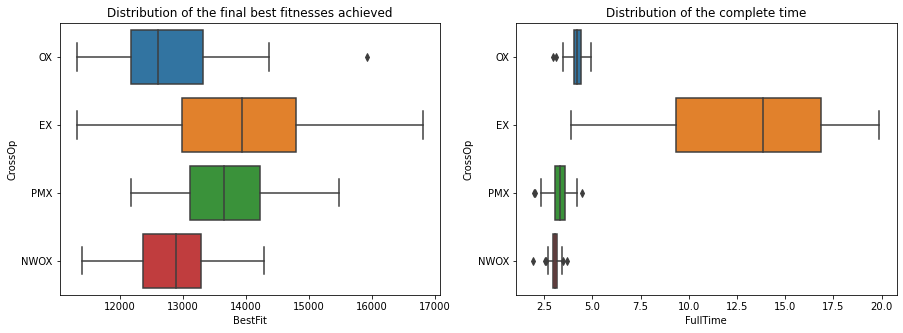

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x="BestFit",y="CrossOp",data=cross_final_data)
plt.title("Distribution of the final best fitnesses achieved")
plt.subplot(122)
sns.boxplot(x="FullTime",y="CrossOp",data=cross_final_data)
plt.title("Distribution of the complete time")
plt.show()

This part of the experimentation has the objective of guessing which could be the best crossover operator when considering the rest of operators fixed. For this, a solution could be studying if there are significant differences on the average best fitness achieved by the operators or the computational cost. Next cell prepares data for subsequent tests.

In [15]:
ox_data = cross_final_data[cross_final_data["CrossOp"]=="OX"]
ex_data = cross_final_data[cross_final_data["CrossOp"]=="EX"]
pmx_data = cross_final_data[cross_final_data["CrossOp"]=="PMX"]
nwox_data = cross_final_data[cross_final_data["CrossOp"]=="NWOX"]
cross_list = [ox_data,ex_data,pmx_data,nwox_data]
cross_names = list(pd.unique(cross_final_data["CrossOp"]))

ox_data_it = cross_iteration_data[cross_iteration_data["CrossOp"]=="OX"]
ex_data_it = cross_iteration_data[cross_iteration_data["CrossOp"]=="EX"]
pmx_data_it = cross_iteration_data[cross_iteration_data["CrossOp"]=="PMX"]
nwox_data_it = cross_iteration_data[cross_iteration_data["CrossOp"]=="NWOX"]
cross_list_it = [ox_data_it,ex_data_it,pmx_data_it,nwox_data_it]
cross_names_it = list(pd.unique(cross_iteration_data["CrossOp"]))

In [21]:
for n,d in zip(cross_names,cross_list):
    print(n,d["BestFit"].mean())

OX 12801.34
EX 13966.32
PMX 13683.88
NWOX 12858.9


First test will be about comparing if the average best fitness is similar or not for the different operators. Doing an ANOVA could tell us if there is the average best fitness is significant in any of these operators, but this method requires the samples to be normally distributed and present homokedasticity. Shapiro-Wilk test and QQ-plots can be used to measure the normality of these distributions, and Barlett's (in case of normal distributions) and Levene's test (more robust to non-normal distributions) could be used to see if there is heteroskedasticity.

Normality Shapiro-Wilk OX: p-value=0.003300850745290518
Normality Shapiro-Wilk EX: p-value=0.438669353723526
Normality Shapiro-Wilk PMX: p-value=0.8925260901451111
Normality Shapiro-Wilk NWOX: p-value=0.23976130783557892
Barlett test for heteroskedasticity: p-value=0.00801997158741166
Levene's test for heteroskedasticity: p-value=0.011132274141336756


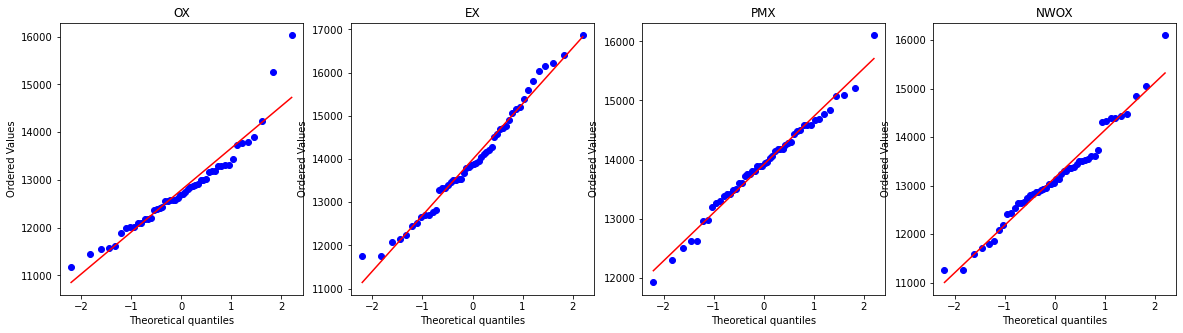

In [13]:
import scipy.stats as stats
plt.figure(figsize=(20,5))
cross_fits = []
for i in range(len(cross_list)):
    name = cross_names[i]
    fit = cross_list[i]["BestFit"]
    cross_fits.append(fit)
    plt.subplot(1,4,i+1)
    stats.probplot(x=fit,plot=plt)
    plt.title(name)
    w, pvalue = stats.shapiro(fit)
    print(f"Normality Shapiro-Wilk {name}: p-value={pvalue}")
w, pvalue = stats.bartlett(cross_fits[0],cross_fits[1],cross_fits[2],cross_fits[3])
print(f"Barlett test for heteroskedasticity: p-value={pvalue}")
w, pvalue = stats.levene(cross_fits[0],cross_fits[1],cross_fits[2],cross_fits[3])
print(f"Levene's test for heteroskedasticity: p-value={pvalue}")

Previous results show that there is heteroskedasticity and only OX's distribution is not normal, maybe because some extreme values that appear in the right tail of the plot. As the homokedasticity assumption is not achieved (needed to make an ANOVA, for instance), a non-parametric approach should be applied for measuring differences between the samples. The Kruskal-Wallis could be seen as the non-parametric version of the ANOVA

In [14]:
fvalue, pvalue = stats.kruskal(cross_fits[0],cross_fits[1],cross_fits[2],cross_fits[3])
print(f"Kruskal-Wallis results: p-value={pvalue}")

Kruskal-Wallis results: p-value=2.4664917074209655e-10


There are significant differences, that is why a post-hoc method should be used to see which operators are different from each other, in this case a Tukey's range test:

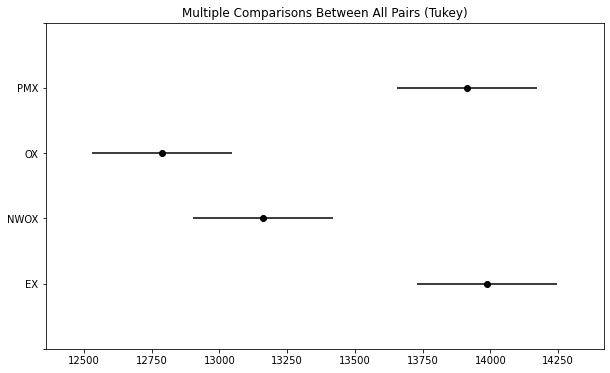

group1,group2,meandiff,p-adj,lower,upper,reject
EX,NWOX,-825.86,0.001,-1343.8216,-307.8984,True
EX,OX,-1198.12,0.001,-1716.0816,-680.1584,True
EX,PMX,-73.32,0.9,-591.2816,444.6416,False
NWOX,OX,-372.26,0.2478,-890.2216,145.7016,False
NWOX,PMX,752.54,0.0013,234.5784,1270.5016,True
OX,PMX,1124.8,0.001,606.8384,1642.7616,True


In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=cross_final_data["BestFit"],groups=cross_final_data["CrossOp"],alpha=0.05)
tukey.plot_simultaneous()
plt.show()
tukey.summary()

This finally shows that EX and PMX show worst best fitnesses in average compared to the rest of operators.There are no significant differences in the average best fitness achieved by these two, which also happens between the order based operators OX and NWOX as their confidence intervals are overlapping. We should say that the number of unfinished instances is a very much higher in the EX case due to the slower convergence from iteration 75 more or less. Other made experimentations without the stopping criterion have concluded that EX gets better results in average (not the PMX case), which could tell us that this criterion could be kind of restrictive for the problem. In fact, we were curious about the performance of the algorithms after 3000 iterations, and the results showed that EX achieved the best solution, which had a fitness under 8000.

In [16]:
print("Number of unfinished instances for each crossover operator")
for i in range(len(cross_list)):
    name = cross_names[i]
    its = cross_list[i]
    print(name, sum(pd.value_counts(its["Iterations"][its["Iterations"]<200])))

Number of unfinished instances for each crossover operator
OX 10
EX 40
PMX 8
NWOX 20


Now the same process will be applied to the duration of the GAs. This was a discussed option fot the team because there are some executions that did not arrive to the maximum number of iterations, meaning that the apparent computed total time would be less than expected. However, by looking at the boxplots (and the fact that only EX had a great number of unfinished tasks) it was seen that in any case EX presented the highest durations so far.

Normality Shapiro-Wilk OX: p-value=6.950592796783894e-05
Normality Shapiro-Wilk EX: p-value=0.018338244408369064
Normality Shapiro-Wilk PMX: p-value=0.10005974024534225
Normality Shapiro-Wilk NWOX: p-value=0.024269653484225273
Barlett test for heteroskedasticity: p-value=3.7617464849534646e-78
Levene's test for heteroskedasticity: p-value=5.178380815765206e-32


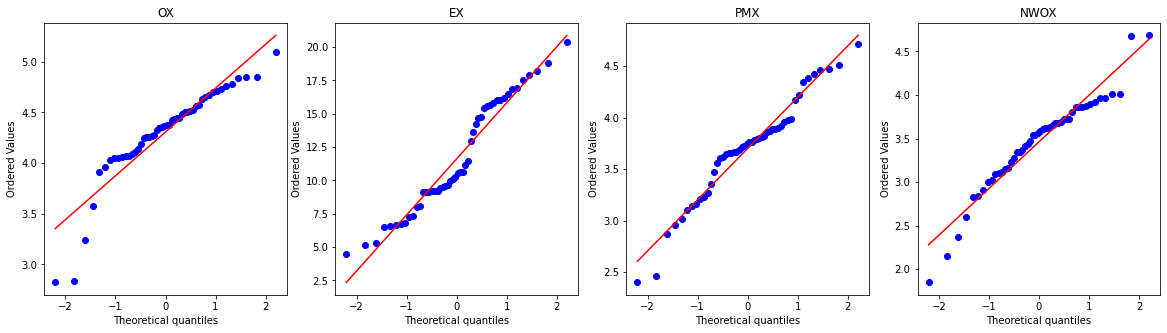

In [17]:
plt.figure(figsize=(20,5))
cross_times = []
for i in range(len(cross_list)):
    name = cross_names[i]
    tim = cross_list[i]["FullTime"]
    cross_times.append(tim)
    plt.subplot(1,4,i+1)
    stats.probplot(x=tim,plot=plt)
    plt.title(name)
    w, pvalue = stats.shapiro(tim)
    print(f"Normality Shapiro-Wilk {name}: p-value={pvalue}")
w, pvalue = stats.bartlett(cross_times[0],cross_times[1],cross_times[2],cross_times[3])
print(f"Barlett test for heteroskedasticity: p-value={pvalue}")
w, pvalue = stats.levene(cross_times[0],cross_times[1],cross_times[2],cross_times[3])
print(f"Levene's test for heteroskedasticity: p-value={pvalue}")

Presence of heteroskedasticity, distributions are not normal. The Kruskal-Wallis can be used again:

In [18]:
fvalue, pvalue = stats.kruskal(cross_times[0],cross_times[1],cross_times[2],cross_times[3])
print(f"Kruskal-Wallis results: p-value={pvalue}")

Kruskal-Wallis results: p-value=3.6185897642664375e-31


As expected from the boxplot, there are clear differences in the average durations. For spotting these, we can either use the Tukey test or the Wilcoxon post-hoc, which finally give the same results:

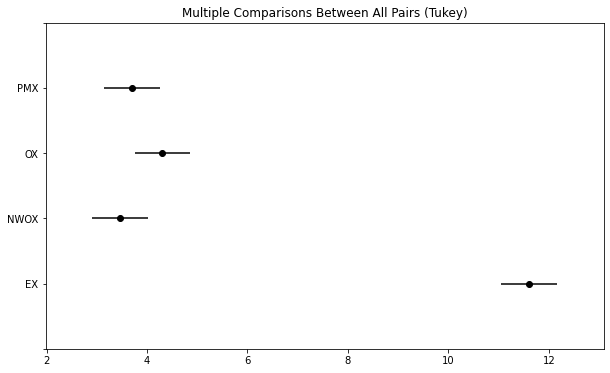

group1,group2,meandiff,p-adj,lower,upper,reject
EX,NWOX,-8.1474,0.001,-9.2574,-7.0374,True
EX,OX,-7.3014,0.001,-8.4113,-6.1914,True
EX,PMX,-7.9065,0.001,-9.0165,-6.7966,True
NWOX,OX,0.846,0.201,-0.2639,1.956,False
NWOX,PMX,0.2409,0.9,-0.8691,1.3508,False
OX,PMX,-0.6051,0.4931,-1.7151,0.5048,False


In [19]:
tukey = pairwise_tukeyhsd(endog=cross_final_data["FullTime"],groups=cross_final_data["CrossOp"],alpha=0.05)
tukey.plot_simultaneous()
plt.show()
tukey.summary()

In [15]:
import scikit_posthocs as sp
#using the wilcoxon pos-hoc test, the same results can be derived
sp.posthoc_wilcoxon(cross_times)

,1,2,3,4
1,1.000000e+00,8.031091e-10,6.759470e-09,9.068058e-10
2,8.031091e-10,1.000000e+00,7.556929e-10,7.556929e-10
3,6.759470e-09,7.556929e-10,1.000000e+00,8.523568e-04
4,9.068058e-10,7.556929e-10,8.523568e-04,1.000000e+00


Iteration time

We thought that the time for each iteration could be a better measure for studying the computational cost of the algorithms, as it does not depend on how many iterations the algorithm does in the end. However, the large amount of data makes the tests not be effective as in the case of Shapiro-Wilk's, which is useful for samples of inferior lenght of 5000. In any case, we tried this option and here are the results. It is seen in the QQ-plots that none of the distributions of time for each crossover operator seems to present a the characteristic of normality

Barlett test for heteroskedasticity: p-value=0.0
Levene's test for heteroskedasticity: p-value=0.0


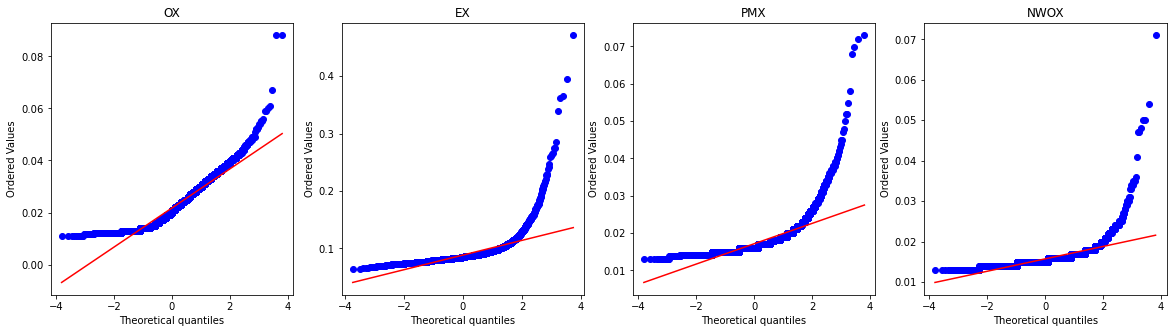

In [16]:
plt.figure(figsize=(20,5))
cross_times_it = []
for i in range(len(cross_list)):
    name = cross_names_it[i]
    tim = cross_list_it[i]["IterationTime"]
    cross_times_it.append(tim)
    plt.subplot(1,4,i+1)
    stats.probplot(x=tim,plot=plt)
    plt.title(name)
    # w, pvalue = stats.shapiro(tim)
    # print(f"Normality Shapiro-Wilk {name}: p-value={pvalue}")
w, pvalue = stats.bartlett(cross_times_it[0],cross_times_it[1],cross_times_it[2],cross_times_it[3])
print(f"Barlett test for heteroskedasticity: p-value={pvalue}")
w, pvalue = stats.levene(cross_times_it[0],cross_times_it[1],cross_times_it[2],cross_times_it[3])
print(f"Levene's test for heteroskedasticity: p-value={pvalue}")

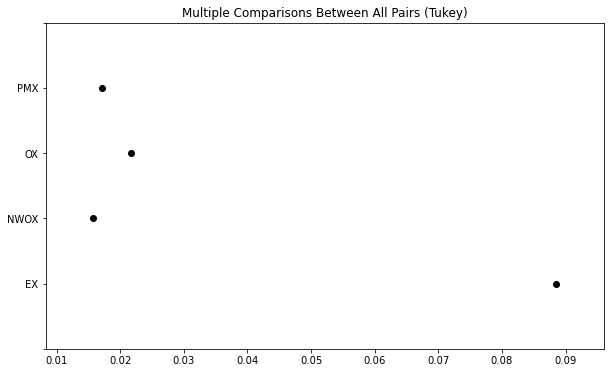

group1,group2,meandiff,p-adj,lower,upper,reject
EX,NWOX,-0.0728,0.001,-0.0731,-0.0724,True
EX,OX,-0.0667,0.001,-0.0671,-0.0664,True
EX,PMX,-0.0714,0.001,-0.0717,-0.071,True
NWOX,OX,0.006,0.001,0.0057,0.0064,True
NWOX,PMX,0.0014,0.001,0.0011,0.0017,True
OX,PMX,-0.0046,0.001,-0.005,-0.0043,True


In [17]:
tukey = pairwise_tukeyhsd(endog=cross_iteration_data["IterationTime"],groups=cross_iteration_data["CrossOp"],alpha=0.05)
tukey.plot_simultaneous()
plt.show()
tukey.summary()

## 2. Mutation

The methodology for the rest of experiments follows the same strategies as before: try all the possible parameters of the type of operator (this case mutation), generate the data in csv and explore the distributions and test statistically if there are significant differences in the best fitness achieved for the configurations, that is why we will leave all code and make little appointments.

In [18]:
instance_list = generate_experimentation_data("mutation_pops","TSP-Instance",instances=50,population_size=100,create_population=False)

In [ ]:
iteration_data, final_data = pd.DataFrame(),pd.DataFrame()
for mut in [HPRM,RSM]:
    it,fi = base_GA(instance_list,PMX,mut,ranked_wheel_selection,"elitist")
    iteration_data = pd.concat([iteration_data,it])
    final_data = pd.concat([final_data,fi])
iteration_data = iteration_data.reset_index()
final_data = final_data.reset_index()
iteration_data.drop(columns=["CrossOp","SelectOp","replacement"],inplace=True)
final_data.drop(columns=["CrossOp","SelectOp","replacement"],inplace=True)
# iteration_data.to_csv("mutation_iteration_data_cr_0801.csv",index=False)
# final_data.to_csv("mutation_data_cr_0801.csv",index=False)

In [19]:
iteration_data = pd.read_csv('mutation_iteration_data_cr_0801.csv')  
final_data = pd.read_csv('mutation_data_cr_0801.csv')  

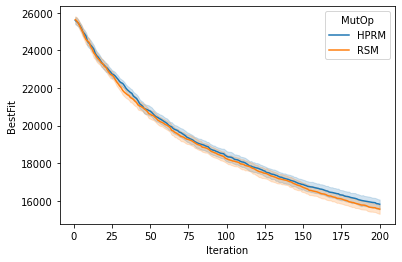

In [20]:
# Fitness vs Iterations
sns.lineplot(x="Iteration",y="BestFit",data=iteration_data,hue="MutOp")
plt.show()

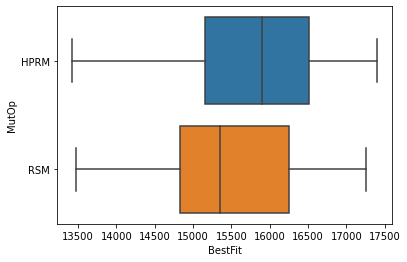

In [21]:
# Boxplot Fitness
sns.boxplot(x="BestFit",y="MutOp",data=final_data)
plt.show()

In [22]:
# Mean fitness
final_data.head()
data_HMRP = final_data[final_data['MutOp']=='HPRM']
data_RSM = final_data[final_data['MutOp']=='RSM']
print(data_HMRP['BestFit'].mean())
print(data_RSM['BestFit'].mean())

15809.56
15550.4


Normality Shapiro-Wilk HPRM: p-value=0.3649267554283142
Normality Shapiro-Wilk RSM: p-value=0.19302275776863098
Barlett test for heteroskedasticity: p-value=0.3939769185226
Levene's test for heteroskedasticity: p-value=0.4321764352013394


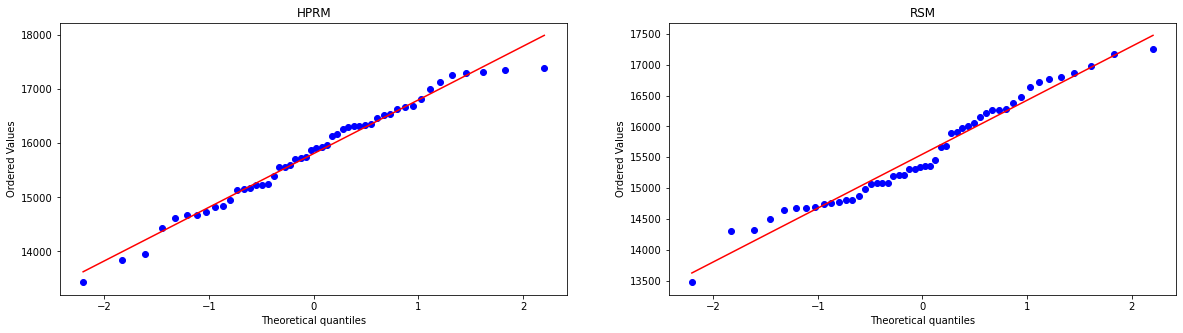

In [23]:
# Normal distribution and heteroskedasticity 
data_HMRP = final_data[final_data['MutOp']=='HPRM']
data_RSM = final_data[final_data['MutOp']=='RSM']
mut_list = [data_HMRP,data_RSM]
mut_names = list(pd.unique(final_data["MutOp"]))

import scipy.stats as stats
plt.figure(figsize=(20,5))
mut_fits = []
for i in range(len(mut_list)):
    name = mut_names[i]
    fit = mut_list[i]["BestFit"]
    mut_fits.append(fit)
    plt.subplot(1,2,i+1)
    stats.probplot(x=fit,plot=plt)
    plt.title(name)
    w, pvalue = stats.shapiro(fit)
    print(f"Normality Shapiro-Wilk {name}: p-value={pvalue}")

w, pvalue = stats.bartlett(mut_fits[0],mut_fits[1])
print(f"Barlett test for heteroskedasticity: p-value={pvalue}")
w, pvalue = stats.levene(mut_fits[0],mut_fits[1])
print(f"Levene's test for heteroskedasticity: p-value={pvalue}")

In this case, only an average comparison with the Student's T test is necessary, as only we are comparing two samples:

In [24]:
# T Student
tvalue, pvalue = stats.ttest_ind(mut_fits[0],mut_fits[1])
print(f"T Student results: p-value={pvalue}") #no differences

T Student results: p-value=0.16258012608509517


## 3. Selection

In [19]:
instance_list = generate_experimentation_data("selection_pops","TSP-Instance",instances=50,population_size=100,create_population=False)

In [ ]:
iteration_data, final_data = pd.DataFrame(),pd.DataFrame()
for sel in [tournament_selection,ranked_split_selection,ranked_wheel_selection]:
    it,fi = base_GA(instance_list,PMX,HPRM,sel,"elitist")
    iteration_data = pd.concat([iteration_data,it])
    final_data = pd.concat([final_data,fi])
iteration_data = iteration_data.reset_index()
final_data = final_data.reset_index()
iteration_data.drop(columns=["CrossOp","MutOp","replacement"],inplace=True)
final_data.drop(columns=["CrossOp","MutOp","replacement"],inplace=True)
# iteration_data.to_csv("sel_iteration_data_cr_0801.csv",index=False)
# final_data.to_csv("sel_data_cr_0801.csv",index=False)

In [23]:
iteration_data = pd.read_csv("sel_iteration_data_cr_0801.csv")
final_data = pd.read_csv("sel_data_cr_0801.csv")
rw_data = final_data[final_data["SelectOp"]=="ranked_wheel_selection"]
rs_data = final_data[final_data["SelectOp"]=="ranked_split_selection"]
tr_data = final_data[final_data["SelectOp"]=="tournament_selection"]
sel_list = [rw_data,rs_data,tr_data]
sel_names = list(pd.unique(final_data["SelectOp"]))

Normality Shapiro-Wilk tournament_selection: p-value=0.4259583055973053
Normality Shapiro-Wilk ranked_split_selection: p-value=0.9929623007774353
Normality Shapiro-Wilk ranked_wheel_selection: p-value=0.5951124429702759
Barlett test for heteroskedasticity: p-value=0.4786604643569693
Levene's test for heteroskedasticity: p-value=0.477162936208507


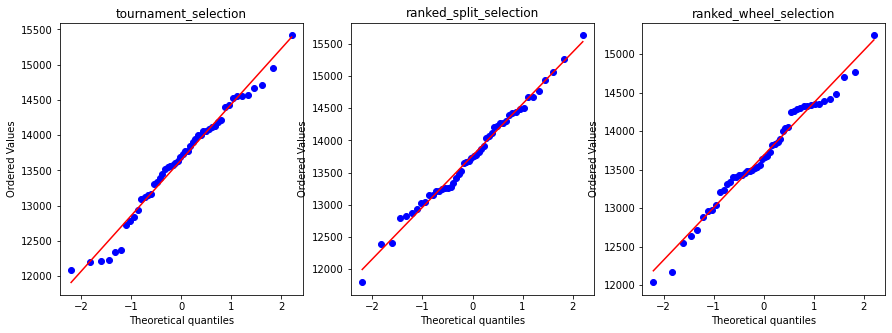

In [24]:
import scipy.stats as stats
plt.figure(figsize=(20,5))
sel_fits = []
for i in range(len(sel_list)):
    name = sel_names[i]
    fit = sel_list[i]["BestFit"]
    sel_fits.append(fit)
    plt.subplot(1,4,i+1)
    stats.probplot(x=fit,plot=plt)
    plt.title(name)
    w, pvalue = stats.shapiro(fit)
    print(f"Normality Shapiro-Wilk {name}: p-value={pvalue}")
w, pvalue = stats.bartlett(sel_fits[0],sel_fits[1],sel_fits[2])
print(f"Barlett test for heteroskedasticity: p-value={pvalue}")
w, pvalue = stats.levene(sel_fits[0],sel_fits[1],sel_fits[2])
print(f"Levene's test for heteroskedasticity: p-value={pvalue}")

In [25]:
fvalue, pvalue = stats.f_oneway(sel_fits[0],sel_fits[1],sel_fits[2])
print(f"ANOVA results: p-value={pvalue}")

ANOVA results: p-value=0.7410348131021114


## 4. Replacement

In [11]:
instance_list = generate_experimentation_data("rep_pops","TSP-Instance",instances=50,population_size=100,create_population=False)

In [12]:
options = ['elitist', 'gap-2', 'gap-x','worst']
iteration_data, final_data = pd.DataFrame(),pd.DataFrame()
for rep_option in options:
    it, fi = base_GA(instance_list,PMX,HPRM,ranked_wheel_selection,rep_option)
    iteration_data = pd.concat([iteration_data, it])
    final_data = pd.concat([final_data, fi])
iteration_data = iteration_data.reset_index()
final_data = final_data.reset_index()
iteration_data.drop(columns=["CrossOp","MutOp","SelectOp"],inplace=True)
final_data.drop(columns=["CrossOp","MutOp","SelectOp"],inplace=True)
# iteration_data.to_csv("replacement_iteration_data.csv")
# final_data.to_csv("replacement_final_data.csv")

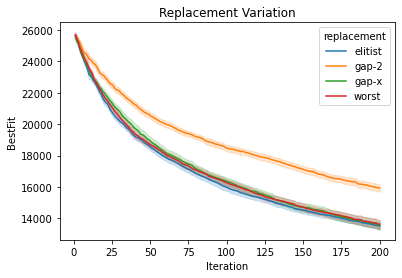

In [13]:
iteration_data = pd.read_csv("replacement_iteration_data.csv")
final_data = pd.read_csv("replacement_final_data.csv")
sns.lineplot(x="Iteration",y="BestFit",data=iteration_data,hue="replacement")
plt.title('Replacement Variation')
plt.show()

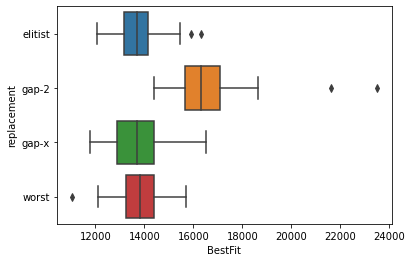

In [14]:
sns.boxplot(x="BestFit",y="replacement",data=final_data)
# sns.boxplot(x="FullTime",y="CrossOp",data=final_data)
# sns.boxplot(x="FullTime",y="CrossOp",data=final_data[final_data["CrossOp"]!="EX"])
plt.show()

In [15]:
el_data = final_data[final_data["replacement"]=='elitist']
gap2_data = final_data[final_data["replacement"]=='gap-2']
gapx_data = final_data[final_data["replacement"]=='gap-x']
worst_data = final_data[final_data["replacement"]=='worst']
repl_list = [el_data, gap2_data, gapx_data, worst_data]
repl_names = list(pd.unique(final_data['replacement']))

Normality Shapiro-Wilk elitist: p-value=0.07317540794610977
Normality Shapiro-Wilk gap-2: p-value=2.607358510431368e-06
Normality Shapiro-Wilk gap-x: p-value=0.08973702043294907
Normality Shapiro-Wilk worst: p-value=0.5652094483375549
Barlett test for heteroskedasticity: p-value=9.730406632958671e-05
Levene's test for heteroskedasticity: p-value=0.08559991144951523


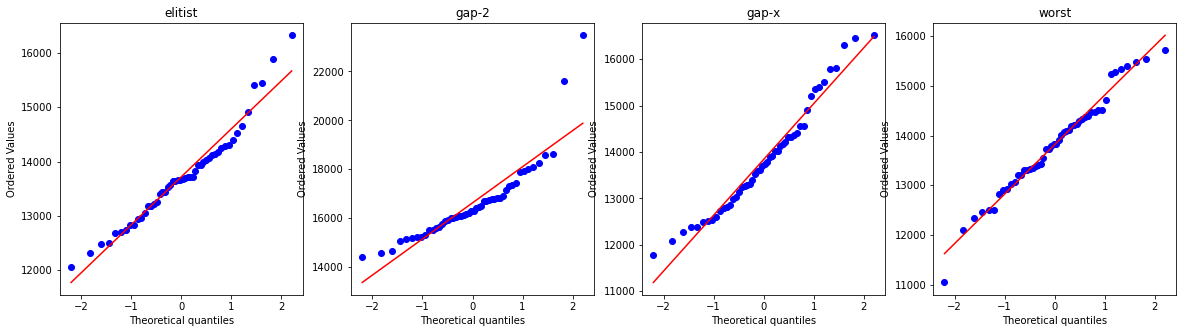

In [16]:
plt.figure(figsize=(20,5))
repl_fits = []
for i in range(len(repl_list)):
    name = repl_names[i]
    fit = repl_list[i]["BestFit"]
    repl_fits.append(fit)
    plt.subplot(1,4,i+1)
    stats.probplot(x=fit,plot=plt)
    plt.title(name)
    w, pvalue = stats.shapiro(fit)
    print(f"Normality Shapiro-Wilk {name}: p-value={pvalue}")
w, pvalue = stats.bartlett(repl_fits[0],repl_fits[1],repl_fits[2],repl_fits[3])
print(f"Barlett test for heteroskedasticity: p-value={pvalue}")
w, pvalue = stats.levene(repl_fits[0],repl_fits[1],repl_fits[2],repl_fits[3])
print(f"Levene's test for heteroskedasticity: p-value={pvalue}")

In [17]:
fvalue, pvalue = stats.f_oneway(repl_fits[0],repl_fits[1],repl_fits[2],repl_fits[3])
print(f"ANOVA results: p-value={pvalue}")

ANOVA results: p-value=6.118709916916662e-31


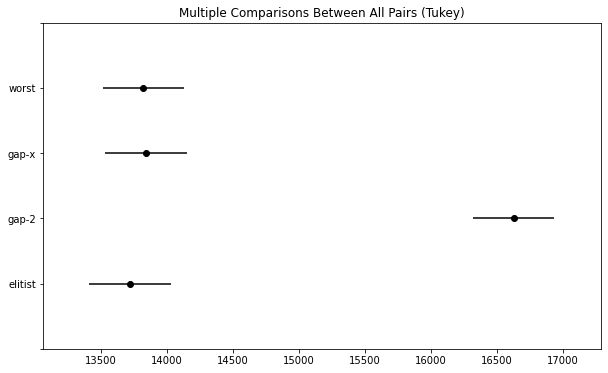

group1,group2,meandiff,p-adj,lower,upper,reject
elitist,gap-2,2907.42,0.001,2287.8678,3526.9722,True
elitist,gap-x,117.44,0.9,-502.1122,736.9922,False
elitist,worst,99.08,0.9,-520.4722,718.6322,False
gap-2,gap-x,-2789.98,0.001,-3409.5322,-2170.4278,True
gap-2,worst,-2808.34,0.001,-3427.8922,-2188.7878,True
gap-x,worst,-18.36,0.9,-637.9122,601.1922,False


In [18]:
tukey = pairwise_tukeyhsd(endog=final_data["BestFit"],groups=final_data["replacement"],alpha=0.05)
tukey.plot_simultaneous()
plt.show()
tukey.summary()